<table width=100%>
<tr>
    <td><h1 style="text-align: left; font-size:300%;">
        Decision Trees
    </h1></td>
    <td width="30%">
    <div style="text-align: right">
    <b> Practical Data Science Lessons</b><br><br>
    <b> Riccardo Bertoglio</b><br>
    <a href="mailto:riccardo.bertoglio@polimi.it">riccardo.bertoglio@polimi.it</a><br>
    </div>
</tr>
</table>

## Learning outcomes 🔎


*   [What are Decision Trees?](#what_are_dts)
*   [How to build Decision Trees?](#how_build_dts)
*   [Comparison with other models](#comparison)
*   [How do decision trees work?](#how_do_dts_work)
*   [Class-imbalanced datasets](#class_imbalance)
*   [Ensemble methods](#ensemble)

#### Resources:
* **Theory:**
    *   *[An Introduction to Statistical Learning](https://www.statlearning.com/)*
* **Practice:**
    *   *[scikit-learn User Guide](https://scikit-learn.org/stable/user_guide.html)*
    *   *[Harvard 2021 CS109-A: Introduction to Data Science](https://harvard-iacs.github.io/2021-CS109A/)*
    *   *[XGBoost official documentation](https://xgboost.readthedocs.io/en/stable/)*
    *   *[scikit-learn tips on practical use](https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use)*

<a id='what_are_dts'></a>
## What are Decision Trees?

Tree-based methods involve stratifying or **segmenting the predictor space into a number of simple regions**. Decision trees can be used for **both regression and classification** tasks. In order to make a prediction for a given observation, we tipically **use the mean or the mode response value of the training observations** in the region to which it belongs. Since the set of splitting rules can be summarized in a tree, these types of approaches are known as decision trees. Tree-based methods are simple and useful for interpretation. However, they typicallly are not competitive with the best supervised learning approaches in terms of prediction accuracy. Hence, in this lesson we also introduce **bagging**, **random forests**, and **boosting**. Each of these approaches involve producing multiple trees which are then combained to yiled a single consensus prediction. We will see that combining  al large number of trees can often result in dramatic improvements in prediciton accuracy, at the expense of some interpretation.

<a id='how_do_dts_work'></a>
### How do decision trees work?

#### The Idea: Decision Trees are just flowcharts and are interpretable!

<img src="fig/flowchart.png" alt="how to fix anything" width="70%"/>


It turns out that simple flow charts can be formulated as mathematical models for classification and these models have the properties we desire:
 - interpretable by humans
 - have sufficiently complex decision boundaries
 - the decision boundaries are locally linear, each component of the decision boundary is simple to describe mathematically

### Basic terminology associated with decision trees:

1. **Nodes**: Nodes are the fundamental building blocks of decision trees. Each node represents a question or a decision based on a feature (attribute) of the dataset. There is a root node, the topmost node in the tree, and two other main types of nodes:
   
   - **Internal Nodes**: Nodes that are not leaf nodes. These nodes represent decisions based on features and lead to further splitting of the dataset.
   
   - **Leaf Nodes**: Also known as terminal nodes, these nodes represent the final outcome of the decision tree. They do not split further and contain the predicted value (in regression) or the class label (in classification).

2. **Branches**: Branches are the lines connecting nodes in a decision tree. They represent the possible outcomes of a decision (based on a feature) and lead from one node to another. Each branch corresponds to a specific value of the feature being evaluated at a node.

<a id='how_build_dts'></a>
## How to build Decision Trees 
To learn a decision tree model, we take a greedy approach: 
 1. Start with an empty decision tree (undivided feature space) 
 2. Choose the ‘optimal’ predictor on which to split and choose the ‘optimal’ threshold value for splitting by applying a **splitting criterion (1)**
 3. Recurse on each new node until **stopping condition (2)** is met
 
For classification, we label each region in the model with the label of the class to which the majority of the points within the region belong. For regression, we use the mean of the points.

### Decision Trees with Scikit-learn
Creating a decision tree for classification is very simple, just instantiate a `DecisionTreeClassifier` object from the `tree` module. Then, use the `fit` method to train the tree.
```python
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
# train_x, train_y is the training data and targets.
tree.fit(train_x, train_y)
```

Decision trees can also be applied to regression problems, using the `DecisionTreeRegressor` class.
As in the classification setting, the fit method will take as argument arrays $X$ and $y$, only that in this case $y$ is expected to have floating point values instead of integer values.
```python
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
# train_x, train_y is the training data and targets.
tree.fit(train_x, train_y)
```

You can evaluate the `tree` model with the usual regression or classification metrics, depending on the task at hand: MSE, MAE, RMSE, accuracy, F1-score, etc.

### Splitting criterion

As you can see from above, a decision tree actually is a binary tree. You start at the root node, choose the branch based on the conditions on the non-leaf nodes, and go all the way down to a leaf node. The label of a leaf node is the prediction of the sample. 

**How do you decide what condition is in one non-leaf node? What metric do we use to split the tree?**
The quality of a candidate split of node is computed **using an impurity function or loss function**, the choice of which depends on the task being solved (classification or regression). The goal is to select the parameters (the feature to split on and the threshold) that minimize the impurity.

- For classification tasks, we use the **Gini Index** or the **Entropy**. 
- For regression we use the **MSE**, **Half Poisson deviance**, or **MAE**. Using the poisson criterion might be a good choice if your target is a count or a frequency (count per some unit). In any case, $y >= 0$ is a necessary condition to use this criterion.

Both sklearn `DecisionTreeRegressor` and `DecisionTreeClassifier` has a `criterion` parameter to set the split criterion.

#### Gini Index
The formula for the Gini Index used for splitting a node in classification decision trees is as follows:
$$
\text{Gini}(p) = \sum_{i=1}^C (p_i \times (1 - p_i))
$$
In this formula, $\text{Gini}(p)$ is the Gini impurity for a node with $C$ classes, and $p_i$ is the proportion of samples in the node that belong to class $i$. The Gini impurity measures the probability of misclassifying a sample in the node if it is randomly assigned to a class based on the class distribution in the node. A Gini impurity of 0 means that the node contains only samples from a single class, while a Gini impurity of 0.5 means that the node contains an equal proportion of samples from all classes.

When building a decision tree, the algorithm evaluates the Gini impurity for each possible split and chooses the split that results in the lowest impurity.

#### Entropy
An alternative to the Gini index is entropy, given by:
$$
\text{Entropy}(p) = - \sum_{i=1}^C p_i \log_2 p_i
$$
In this formula, $\text{Entropy}(p)$ is the entropy of a node with $C$ classes, and $p_i$ is the proportion of samples in the node that belong to class $i$. The entropy measures the impurity or uncertainty of a node, where a node with a high entropy contains samples from multiple classes in similar proportions, while a node with low entropy contains samples from a single class.

The entropy formula involves taking the negative sum of the products of $p_i$ and the logarithm (base 2) of $p_i$ for each class $i$. The logarithm is used to weight the contribution of each class based on its proportion, such that classes with a larger proportion have a higher weight in the calculation. The entropy is minimized when all samples in the node belong to the same class (i.e., $p_i = 1$ for one class and $p_i = 0$ for all other classes), and is maximized when the samples are evenly distributed across all classes (i.e., $p_i = 1/C$ for all classes).

#### Classification example
<img src="fig/split1.png" alt="split1" width="70%"/>
<img src="fig/split2.png" alt="split2" width="70%"/>

<img src="fig/simple_tree.png" alt="tree_adj" width="39%"/>
<img src="fig/tree_loss.png" alt="tree_adj" width="39%"/>

### Stopping condition

If we don’t terminate the decision tree learning algorithm manually, the tree will continue to grow until each region defined by the model possibly contains exactly one training point (and the model attains 100% training accuracy). **Not stopping while building a deeper and deeper tree = 100% training accuracy; What will your test accuracy be? What can we do to fix this?**

Their complexity should be constrained using some techniques:
- Setting the minimum number of samples required at a leaf node. Use the `min_samples_leaf` parameter with scikit-learn classes.
- Setting the minimum number of samples required to split an internal node. Use the `min_samples_split` parameter.
- Setting the maximum depth of the tree. Use the `max_depth` parameter.
- Setting a minimum impurity decrease threshold for a split. A node will be split if this split induces a decrease of the impurity greater than or equal to the threshold. Use the `min_impurity_decrease` parameter. However, this strategy could be too short-sighted since a seemingly worthless split early on in the tree might be followed by a very good split—that is, a split that leads to a large reduction in impurity later on. Therefore, a better strategy is to grow a very large tree, and then **prune** it back in order to obtain a subtree.
- **Pruning** consists of selecting a subtree of a more complex tree so to reduce the test error rate. However, estimating the test error for every possible subtree would be too cumbersome, since there is an extremely large number of possible subtrees. Thus, we use the **Minimal cost-complexity** pruning algorithm.

#### Minimal cost-complexity
Rather than considering every possible subtree, we consider a sequence of trees indexed by a nonnegative tuning parameter $\alpha$. For each value of $\alpha$ there corresponds a subtree $T ⊂ T_{0}$ such that

$$
R_{\alpha}(T) = R(T) + \alpha|T|
$$

is as small as possible.

In this formula, $R_{\alpha}(T)$ is the cost complexity criterion for a tree $T$ with regularization parameter $\alpha$, $|T|$ is the number of terminal nodes (i.e., leaves) in the tree, and $R(T)$ is the total impurity of the terminal nodes.

It turns out that as we increase $\alpha$ from zero, branches get pruned from the tree in a nested and predictable fashion, so obtaining the whole sequence of subtrees as a function of $\alpha$ is easy. We can select a value of $\alpha$ using a validation set or using cross-validation. We then return to the full data set and obtain the subtree corresponding to $\alpha$.

In scikit-learn you can set $\alpha$ with the `ccp_alpha` parameter.

<a id='comparison'></a>
## Comparison with other models
### Advantages
- Decision Trees (DTs) are simple to understand and interpret.
- Can handle both numerical and categorical data. However, the scikit-learn implementation does not support categorical variables for now.
- Require little data preparation. Other techniques often require data normalization, dummy variables need to be created and blank values to be removed. 
### Disadvatages
- DTs are easy to overfit (it can be mitigated by pruning or using ensemble methods).
- Simple DT usually show worse perfomance than other supervised models (however, ensemble methods can increase the performance).
- DTs can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.
- DTs create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

<a id='class_imbalance'></a>
## Class-imbalanced datasets
Machine learning algorithm can be biased if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree. Alternatively, class balancing can be done by associating weights to samples. The less represented samples will be weighted more. In scikit-learn, you can specify class-wise weights with the `class_weight` parameter of `DecisionTreeClassifier`, or by setting the `sample_weight` parameter of the `fit` method to specify single weights for each sample. The `class_weight` parameter can also be set to `balanced`. The “balanced” mode uses the values of $y$ to automatically adjust weights inversely proportional to class frequencies in the input data as `n_samples / (n_classes * np.bincount(y))`

## Classification on the Spam Dataset

In [24]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn import datasets

# new model objects
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

%matplotlib inline

pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

from sklearn.model_selection import learning_curve

We will be working with a spam email dataset. The dataset has 57 predictors with a response variable called `Spam` that indicates whether an email is spam or not spam. The goal is to be able to **create a classifier or method that acts as a spam filter**.

In [2]:
# Import Dataframe and Set Column Names
spam_df = pd.read_csv('data/spam.csv', header=None)
columns = ["Feature_"+str(i+1) for i in range(spam_df.shape[1]-1)] + ['Spam']
spam_df.columns = columns
display(spam_df.head())
len(spam_df)

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Feature_31,Feature_32,Feature_33,Feature_34,Feature_35,Feature_36,Feature_37,Feature_38,Feature_39,Feature_40,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50,Feature_51,Feature_52,Feature_53,Feature_54,Feature_55,Feature_56,Feature_57,Spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


4601

The predictors are all continuous. They represent certain features like the frequency of the word `'discount'`. The exact specification and description of each predictor can be found online. We are not so much interested in the exact inference of each predictor so we will omit the exact names of each of the predictors. We are more interested in the predictions of the algorithm so we will not go into detail about the individual features.

Link to dataset description: https://archive.ics.uci.edu/ml/datasets/spambase

### Split data into train and test

**Note:** While you will use ```train_test_split``` in most cases, the code below should help you visualize splitting/masking of a dataframe which will be helpful in general.

Let us split the dataset into a 70-30 split by using the following:

In [3]:
np.random.seed(42)

# draw n samples from the uniform distribution
uniform_samples = np.random.rand(len(spam_df))

# create boolean mask
msk = uniform_samples < 0.7

In [4]:
# subset the combined design matrix/ response dataframe with the boolean mask
data_train = spam_df[msk]
data_test  = spam_df[~msk]

# Split predictor and response columns
x_train, y_train = data_train.drop(['Spam'], axis=1), data_train['Spam']
x_test , y_test  = data_test.drop(['Spam'] , axis=1), data_test['Spam']

print("Shape of Training Set :", data_train.shape)
print("Shape of Testing Set :", data_test.shape)

Shape of Training Set : (3262, 58)
Shape of Testing Set : (1339, 58)


In [5]:
msk

array([ True, False, False, ...,  True,  True,  True])

In [6]:
x_train.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Feature_31,Feature_32,Feature_33,Feature_34,Feature_35,Feature_36,Feature_37,Feature_38,Feature_39,Feature_40,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50,Feature_51,Feature_52,Feature_53,Feature_54,Feature_55,Feature_56,Feature_57
0,0.0,0.64,0.64,0.0,0.32,0.0,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.0,0.0,0.32,0.0,1.29,1.93,0.0,0.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.778,0.000,0.0,3.756,61,278
3,0.0,0.00,0.00,0.0,0.63,0.0,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.0,0.0,0.31,0.0,0.00,3.18,0.0,0.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.137,0.0,0.137,0.000,0.0,3.537,40,191
4,0.0,0.00,0.00,0.0,0.63,0.0,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.0,0.0,0.31,0.0,0.00,3.18,0.0,0.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.135,0.0,0.135,0.000,0.0,3.537,40,191
5,0.0,0.00,0.00,0.0,1.85,0.0,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.223,0.0,0.000,0.000,0.0,3.000,15,54
6,0.0,0.00,0.00,0.0,1.92,0.0,0.00,0.00,0.00,0.64,0.96,1.28,0.00,0.0,0.0,0.96,0.0,0.32,3.85,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054,0.0,0.164,0.054,0.0,1.671,4,112


We can check that the number of spam cases is roughly evenly represented in both the training and test set.

In [7]:
# Check Percentage of Spam in Train and Test Set
pct_spam_tr = 100*y_train.mean()
pct_spam_te = 100*y_test.mean()
                                                  
print(f"Percentage of Spam in Training Set \t : {pct_spam_tr:0.2f}%")
print(f"Percentage of Spam in Testing Set \t : {pct_spam_te:0.2f}%")

Percentage of Spam in Training Set 	 : 39.18%
Percentage of Spam in Testing Set 	 : 39.96%


### Fitting an Optimal Single Decision Tree (by Depth)

We fit here a single tree to our spam dataset and perform 5-fold cross-validation on the training set. For **each** decision tree depth, we fit a tree and then compute the 5-fold CV scores. These scores are then averaged and compared across different depths. 

In [8]:
# Find optimal depth of trees
mean_CV_acc = {}
all_CV_acc = {}
tree_depth_start, tree_depth_end, steps = 3, 31, 4
for i in range(tree_depth_start, tree_depth_end + 1, steps):
    
    # declare tree model object
    model = DecisionTreeClassifier(max_depth=i)
    
    # get cv scores
    # the default score for DecisionTreeClassifier is the accuracy
    scores = cross_val_score(estimator=model, X=x_train, y=y_train, cv=5, n_jobs=-1)
    
    all_CV_acc[i] = scores
    mean_CV_acc[i] = scores.mean()

In [9]:
mean_CV_acc

{3: 0.8764437847029753,
 7: 0.8960691100066706,
 11: 0.8917760407369479,
 15: 0.8887127838480258,
 19: 0.8834989994269018,
 23: 0.8838057478931596,
 27: 0.8798203665949511,
 31: 0.8828869117522713}

Some dictionary manipulations for our x,y construction for the plot below:

In [10]:
x = list(mean_CV_acc.keys())
y = list(mean_CV_acc.values())
x,y

([3, 7, 11, 15, 19, 23, 27, 31],
 [0.8764437847029753,
  0.8960691100066706,
  0.8917760407369479,
  0.8887127838480258,
  0.8834989994269018,
  0.8838057478931596,
  0.8798203665949511,
  0.8828869117522713])

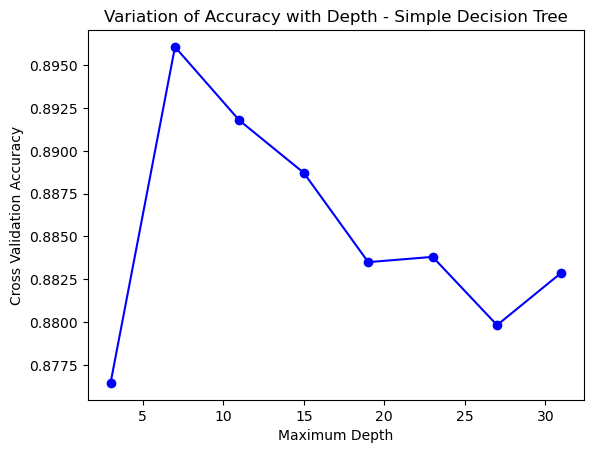

In [11]:
# Plot
plt.ylabel("Cross Validation Accuracy")
plt.xlabel("Maximum Depth")
plt.title('Variation of Accuracy with Depth - Simple Decision Tree')
plt.plot(x, y, 'b-', marker='o')
plt.show()

As we can see, the optimal depth is found to be a depth of 7.

If we wanted to get the Confidence Bands of these results, how would we? It's as simple as a combination of getting variance using ```scores.std()``` and ```plt.fill_between()```.

In [12]:
stds = np.array([ np.std(scores) for scores in all_CV_acc.values() ])
stds

array([0.05181994, 0.03760337, 0.04590182, 0.04265664, 0.0418768 ,
       0.04488513, 0.04779157, 0.04663305])

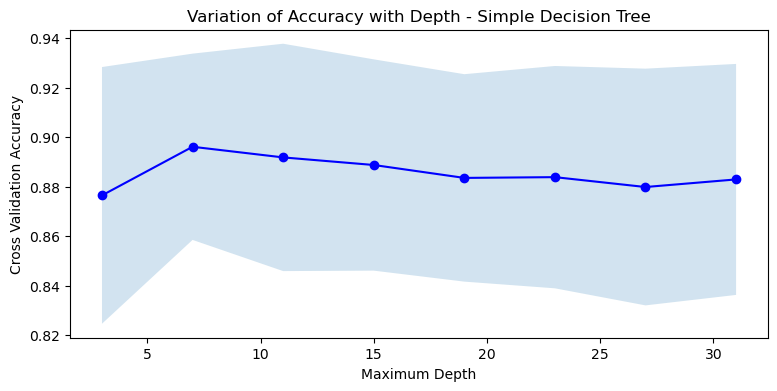

In [13]:
plt.figure(figsize = (9,4))
plt.fill_between(x, y + stds, y - stds, alpha=0.2)

# Plot
plt.ylabel("Cross Validation Accuracy")
plt.xlabel("Maximum Depth")
plt.title('Variation of Accuracy with Depth - Simple Decision Tree')
plt.plot(x, y, 'b-', marker='o')
plt.show()

If we want to display it as a boxplot we first construct a dataframe with all the scores and second we use ```sns.boxplot(...)```

In [14]:
# Making a numpy array with all the CV acc scores
cv_scores_df = pd.DataFrame(all_CV_acc.values(), index = all_CV_acc.keys()).T
cv_scores_df

,3,7,11,15,19,23,27,31
0,0.915773,0.908116,0.900459,0.891271,0.891271,0.894334,0.888208,0.888208
1,0.877489,0.906585,0.909648,0.905054,0.901991,0.898928,0.897397,0.900459
2,0.904908,0.918712,0.915644,0.912577,0.900307,0.907975,0.904908,0.906442
3,0.907975,0.924847,0.930982,0.927914,0.921779,0.921779,0.921779,0.926380
4,0.776074,0.822086,0.802147,0.806748,0.802147,0.796012,0.786810,0.792945


In [15]:
# melt
trees = pd.melt(cv_scores_df, var_name="Max Depth", value_name='CV Accuracy Score')
trees.head(10)

# this code achieves the same thing without pd.melt:
# Making a dataframe
# trees = pd.DataFrame({'Max Depth':list(x)*5, 'CV Accuracy Score': list(cv_scores_df.values.T.flatten())})
# trees.head()

,Max Depth,CV Accuracy Score
0,3,0.915773
1,3,0.877489
2,3,0.904908
3,3,0.907975
4,3,0.776074
5,7,0.908116
6,7,0.906585
7,7,0.918712
8,7,0.924847
9,7,0.822086


c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

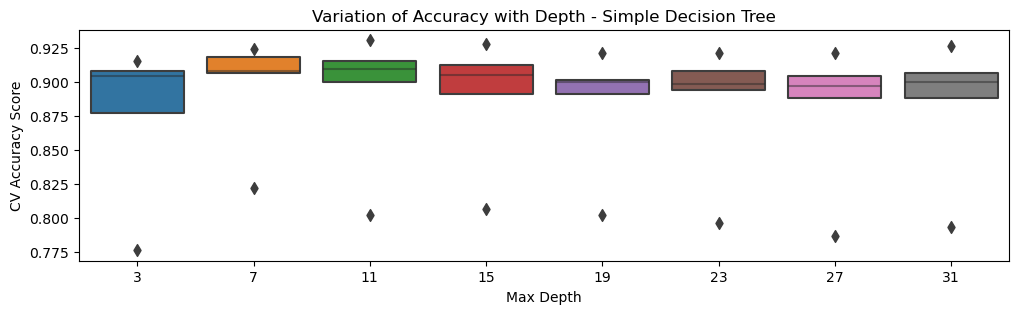

In [16]:
# plotting the boxplot 
plt.figure(figsize=(12, 3))
plt.title('Variation of Accuracy with Depth - Simple Decision Tree')
sns.boxenplot(x="Max Depth", y="CV Accuracy Score", data=trees);

c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

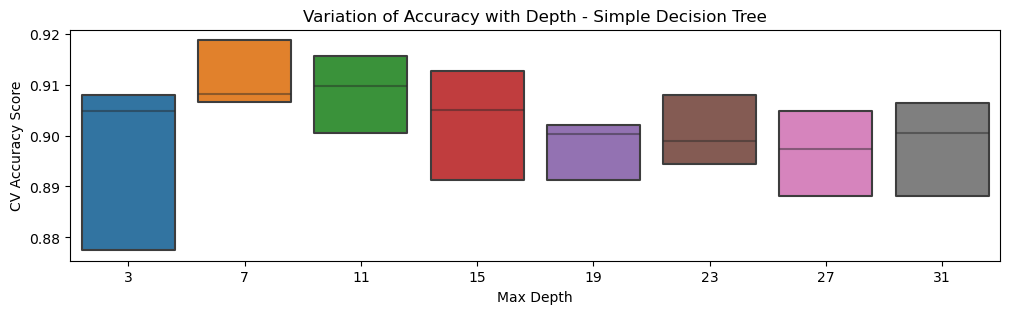

In [17]:
# plotting the boxplot without outliers (showfliers = False)
plt.figure(figsize=(12, 3))
plt.title('Variation of Accuracy with Depth - Simple Decision Tree')
sns.boxenplot(x="Max Depth", y="CV Accuracy Score", data=trees, showfliers=False);

**Let's extract the best_depth value from this dictionary:** 

We create the new variable `best_depth`.

We first sort the mean CV accuracy scores by using the `sorted()` function that accepts a "key function" as parameter. This is an optional parameter that specifies a function of one argument to extract a comparison key from each element in the iterable. The key function is applied to each element before sorting, and the sorted list is returned based on the comparison of the keys. 

`reverse` is also an optional parameter that specifies the sort order. If `reverse` is set to `True`, the sorted list is returned in descending order. If `reverse` is set to `False` or not specified, the sorted list is returned in ascending order.

```sorted(iterable, key, reverse)```

In [18]:
# What does this do? Is this the result we want?
sorted(mean_CV_acc, reverse=False)

[3, 7, 11, 15, 19, 23, 27, 31]

In [19]:
# What does this do?
sorted(mean_CV_acc, key=mean_CV_acc.get, reverse=True)

[7, 11, 15, 23, 19, 31, 27, 3]

In [20]:
# Make best depth a variable
best_depth = sorted(mean_CV_acc, key=mean_CV_acc.get, reverse=True)[0]
print("The best depth was found to be:", best_depth)

The best depth was found to be: 7


In [21]:
# Evalaute the performance at the best depth
model_tree = DecisionTreeClassifier(max_depth=best_depth)
model_tree.fit(x_train, y_train)

# Check Accuracy of Spam Detection in Train and Test Set
acc_trees_training = accuracy_score(y_train, model_tree.predict(x_train))
acc_trees_testing  = accuracy_score(y_test,  model_tree.predict(x_test))

print("Simple Decision Trees: Accuracy, Training Set \t : {:.2%}".format(acc_trees_training))
print("Simple Decision Trees: Accuracy, Testing Set \t : {:.2%}".format(acc_trees_testing))

Simple Decision Trees: Accuracy, Training Set 	 : 94.39%
Simple Decision Trees: Accuracy, Testing Set 	 : 90.81%


In [22]:
# Get Performance by Class (Lookup Confusion Matrix)
pd.crosstab(index    = y_test, 
            columns  = model_tree.predict(x_test), 
            rownames = ['Actual'],
            colnames = ['Predicted'],
            margins  = True)

Predicted,0,1,All
Actual,,,
0,758,46,804
1,77,458,535
All,835,504,1339


As a tree model, this model should look like a real tree with branches and leaves. `sklearn` provides a very useful function, `plot_tree`, to plot your tree.

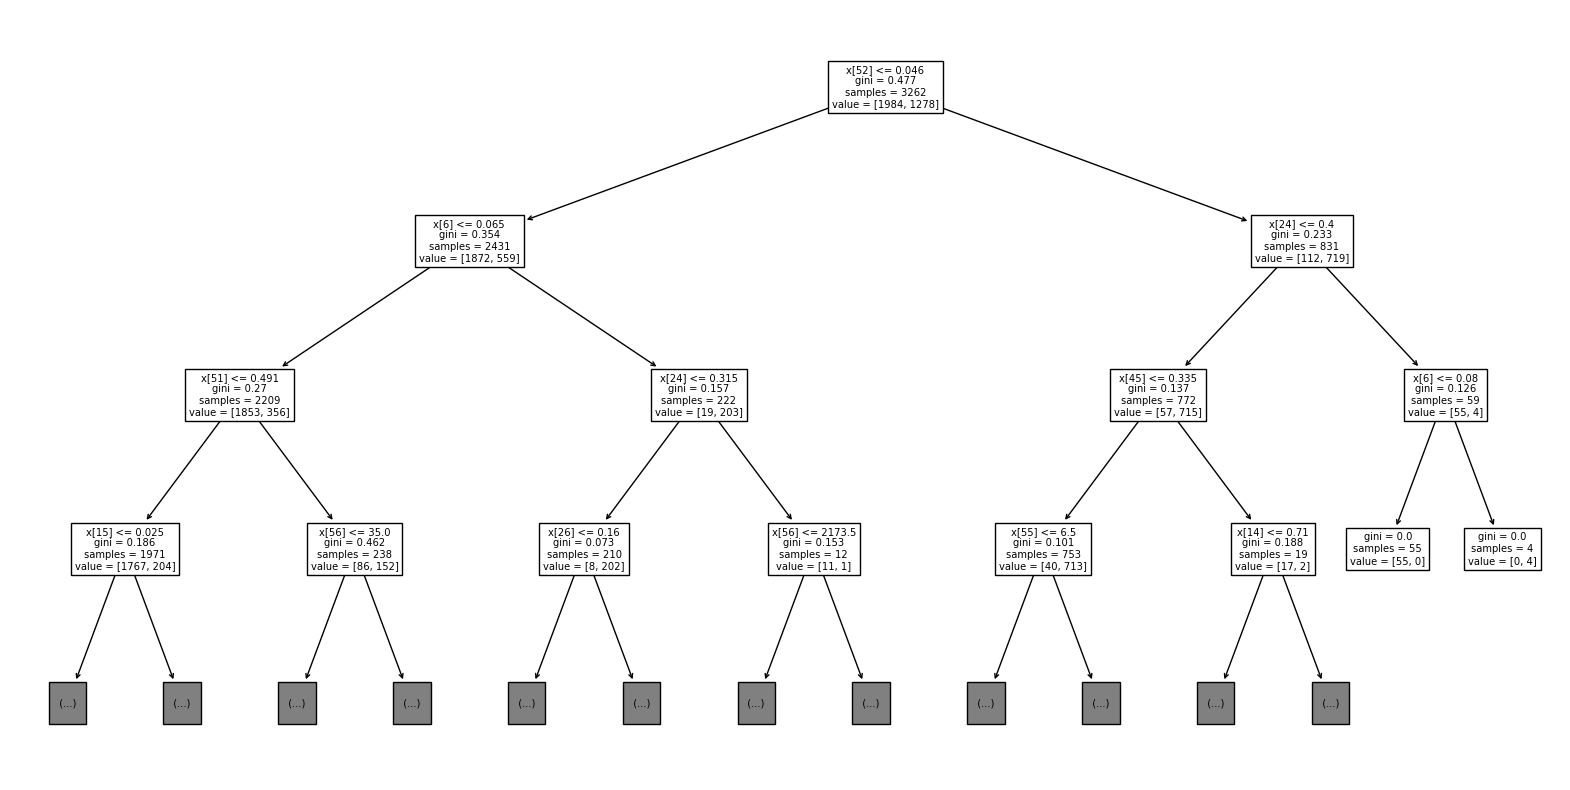

In [26]:
# Plot of tree fit on the Iris dataset
plt.figure(figsize=(20, 10))
sklearn.tree.plot_tree(model_tree, max_depth=3)
plt.show()

<a id='exercise_1'></a>
## Exercise 1

Let's try out decision tree models on a cancer dataset. Click <a href = "https://towardsdatascience.com/building-a-simple-machine-learning-model-on-breast-cancer-data-eca4b3b99fa3">here</a> for another example with this dataset and more information.

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.

Features:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry 
- fractal dimension ("coastline approximation" - 1)

Target:
- Diagnosis (M = malignant, B = benign)

In [27]:
from functions import tree_pd
import numpy as np

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn import datasets

%matplotlib inline

pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

from sklearn.model_selection import learning_curve

get_tree_scores = tree_pd.get_tree_scores
cancer_scaled, target = tree_pd.load_cancer_dataset(10, 4)

Design matrix shape (569, 10)


,texture error,worst texture,worst symmetry,compactness error,worst radius,worst compactness,concave points error,worst fractal dimension,fractal dimension error,mean radius
0,-0.565265,-1.359293,2.750622,1.316862,1.886690,2.616665,0.660820,1.937015,0.907083,1.097064
1,-0.876244,-0.369203,-0.243890,-0.692926,1.805927,-0.430444,0.260162,0.281190,-0.099444,1.829821
2,-0.780083,-0.023974,1.152255,0.814974,1.511870,1.082932,1.424827,0.201391,0.293559,1.579888
3,-0.110409,0.133984,6.046041,2.744280,-0.281464,3.893397,1.115007,4.935010,2.047511,-0.768909


target classes    {1: 'Benign', 0: 'Malignant'}
There are 357 Benign cases and 212 Malignant cases in the target


## Your tasks are as follows:

0) Perform a manual 80-20 train-test split

In [ ]:
################################### Train Test split
np.random.seed(40)

# test_proportion
test_prop = 0.2

# sample from a random uniform distribution
uniform_samples = np.random.uniform(0, 1, ...)
# create a boolean vector mask
msk = ...
 
# Split predictor and response columns
x_train, y_train = ...
x_test , y_test  = ...

print("Shape of Training Set :", x_train.shape)
print("Shape of Testing Set :" , x_test.shape)

1) Use the `get_tree_scores` function to assign a dataframe of cross-validation scores for different depths of a `DecisionTreeClassifier`. Specifically feed the function a class instance with `random_state=42`.  This function takes four arguments (x_train, y_train, model, tree_depth_range). This function returns a dictionary of scores.

2) Use `pd.DataFrame` and `pd.melt` to assign a dataframe `cv_acc_df`. This dataframe should have two columns: `depth`  and `cv_acc_score`. Hint: check out the `var_name` and `value_name` arguments of `pd.melt`.

3) Visualize the mean cross validation accuracy scores using `sns.boxenplot` or another function of your choice similar to `sns.catplot`

4) Use pandas `groupby` function to to get the mean cross-validation accuracy for specific depths. Assign to a new dataframe `cv_acc_mean`.

5) Visualize the mean cross validation accuracy scores using `sns.lineplot` in combination with `cv_acc_mean`. Discuss what you see with your group.

In [ ]:
# Your code here


Once you have successfully completed the code above, this code should run without a problem

In [ ]:
max_idx = cv_acc_mean["cv_acc_score"].idxmax()
best_depth = cv_acc_mean["depth"][max_idx]
print("best depth {:}".format(best_depth))

model = DecisionTreeClassifier(max_depth=best_depth)
model.fit(x_train, y_train)

cancer_tree_accuracy = model.score(x_test, y_test)

print("Testing set accuracy {:.4f}".format(cancer_tree_accuracy))

Now answer the following questions:
- Why is the best depth the value that it is?
- Why might the deeper trees be over or under fitting on this particular dataset?

In [ ]:
# let's visualize the tree
file_name = "results/small_tree.dot"
tree.export_graphviz(model, out_file=file_name) 
(graph,) = pydot.graph_from_dot_file(file_name)
graph.write_png('results/small_tree.png')

- Let's display the ```small_tree.png``` in markdown:

Markdown: ```![title](results/small_tree.png)```. The result: 

![title](results/small_tree.png)

*Repost Question:* Do you think this tree is interpretable?

**Try feeding the get_tree_pd an additional "bootstraps" argument and comment on what happens to the validation accuracy.**

In [ ]:
# Your code here


<a id='ensemble'></a>
## Ensemble methods
An ensemble method is an approach that combines many simple “building ensemble block” models in order to obtain a single and potentially very powerful model. These simple building block models are sometimes known as _weak learners_, since they may lead to mediocre predictions on their own. We will now discuss bagging, random forests, and boosting. These are ensemble methods for which the simple building block is a regression or a classification tree.

<a id='bagging'></a>
### Bagging

*QUESTION:* Where does the word "*Bagging*" come from?

 1. **Bootstrap:** we generate multiple samples of training data, via bootstrapping (resample with replacements). We train a full decision tree on each sample of data. 
 2. **AGGregatiING** for a given input, we output the averaged outputs of all the models for that input. 
 
This method is called **Bagging: B** ootstrap + **AGG**regat**ING**. 

Bagging, or _Bootstrap aggregation_, is a general-purpose procedure for reducing the variance of a statistical learning method. Indeed, given a set of $n$ independent observations $Z_1,...,Z_n$, each with variance $\sigma^2$, the variance of the mean $\bar{Z}$ of the observations is given by $\sigma^2/n$. In other words, averaging a set of observations reduces variance. Hence a natural way to reduce the variance and increase the test set accuracy of a statistical learning method is to take many training sets from the population, build a separate prediction model using each training set, and average the resulting predictions. In other words, we could calculate $\hat{f}_1(x), \hat{f}_2(x), ..., \hat{f}_B(x)$ using $B$ separate training sets, and average them in order to obtain a single low-variance statistical learning model, given by:

$$
\hat{f}_{\text{avg}}(x) = \frac{1}{B} \sum_{b=1}^B \hat{f}_b(x)
$$

Of course, this is not practical because we generally do not have access to multiple training sets. Instead, we can _bootstrap_ by taking repeated samples from the (single) training dataset. Bootstrapping means to create multiple training datasets from a single original dataset. Each of the bootstrapped datasets is generated by randomly sampling observations from the original dataset with replacement. In this approach, we generate $B$ different bootstrapped training datasets. We then train our method on the $b$-th bootstrapped training set in order to get $\hat{f}^*_b(x)$, and finally average all the predictions to obtain:

$$
\hat{f}_{\text{bag}}(x) = \frac{1}{B} \sum_{b=1}^B \hat{f}^*_b(x)
$$

This technique is called bagging. The number of trees $B$ is not a critical parameter with bagging; using a very large value of $B$ will not lead to overfitting. In practice we use a value of $B$ sufficiently large that the error has settled down.

Bagging can be used with a variety of different statistical learning methods, both for regression and classification tasks, but in this notebook we will see it applied to decision trees.

In scikit-learn, bagging methods are offered as a unified `BaggingClassifier` meta-estimator (resp. `BaggingRegressor`), taking as input a user-specified estimator along with parameters specifying the strategy to draw random subsets. In particular, `max_samples` control the size of the subsets, while `bootstrap` control whether samples are drawn with or without replacement.

#### Predicting with Bagging
A bagging ensemble makes predictions by combining the predictions of the multiple base models. For regression problems, the individual predictions are typically averaged to produce the final prediction of the ensemble. For classification problems, the individual predictions can be combined using a majority voting scheme (for binary classification) or a weighted voting scheme (for multi-class classification), where the weight of each vote is proportional to the confidence or probability of the corresponding base model.

In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier,
                            max_samples=0.5, bootstrap=True)

#### Variable Importance Measures
As we have discussed, bagging typically results in improved accuracy over prediction using a single tree. Unfortunately, however, it can be difficult to interpret the resulting model. Recall that one of the advantages of decision trees is the attractive and easily interpreted diagram that results. However, when we bag a large number of trees, it is no longer possible to represent the resulting statistical learning procedure using a single tree, and it is no longer clear which variables are most important to the procedure. Thus, bagging improves prediction accuracy at the expense of interpretability. Although the collection of bagged trees is much more difficult to interpret than a single tree, one can obtain an overall summary of the importance of each predictor using the impurity measures. In the case of bagging regression trees, we can record the total amount that the MSE is decreased due to splits over a given predictor, averaged over all $B$ trees. A large value indicates an important predictor. Similarly, in the context of bagging classification trees, we can add up the total amount that the Gini index is decreased by splits over a given predictor, averaged over all $B$ trees.

scikit-learn does not offer methods to return the features importance resulting from an ensemble model but we can compute it ourselves with those of the individual models. It is just an average of `tree.feature_importances_` over all trees in `bagging.estimators_` as follows:

In [8]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
clf = BaggingClassifier(DecisionTreeClassifier())
clf.fit(X, y)

feature_importances = np.mean([
    tree.feature_importances_ for tree in clf.estimators_
], axis=0)

In [9]:
feature_importances

array([0.01691629, 0.01285019, 0.45651207, 0.51372145])

## Bagging with the Spam dataset

Let's bootstrap our training dataset to create multiple datasets and fit Decision Tree models to each.

<img src="fig/bagging_array.png" alt="tree_adj" width="80%"/>

In [ ]:
# Stat on all data
data_train.mean(axis=0).to_frame('mean').T

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Feature_31,Feature_32,Feature_33,Feature_34,Feature_35,Feature_36,Feature_37,Feature_38,Feature_39,Feature_40,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50,Feature_51,Feature_52,Feature_53,Feature_54,Feature_55,Feature_56,Feature_57,Spam
mean,0.105984,0.206603,0.284908,0.06607,0.309537,0.096462,0.11218,0.110368,0.088734,0.243182,0.062624,0.537961,0.096045,0.056395,0.049942,0.265929,0.139779,0.188832,1.691186,0.097235,0.81599,0.120224,0.097961,0.088694,0.528384,0.256327,0.776444,0.128697,0.097863,0.110806,0.064712,0.050377,0.102446,0.050635,0.112554,0.102541,0.135935,0.014834,0.081824,0.06897,0.039641,0.123467,0.045371,0.072471,0.308231,0.182955,0.005607,0.03191,0.036318,0.141634,0.018758,0.277636,0.071341,0.051376,5.300716,52.760883,278.253525,0.391784


In [ ]:
x_train, y_train = data_train.drop(['Spam'], axis=1), data_train['Spam']
x_test , y_test  = data_test.drop(['Spam'] , axis=1), data_test['Spam']

In [ ]:
data_train.sample(frac=1., replace=True).mean(axis=0).to_frame('mean').T

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Feature_31,Feature_32,Feature_33,Feature_34,Feature_35,Feature_36,Feature_37,Feature_38,Feature_39,Feature_40,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50,Feature_51,Feature_52,Feature_53,Feature_54,Feature_55,Feature_56,Feature_57,Spam
mean,0.104448,0.161355,0.294344,0.067456,0.32092,0.096987,0.105046,0.105944,0.084644,0.228013,0.059608,0.516885,0.102486,0.057069,0.05095,0.263734,0.132005,0.19595,1.675405,0.089513,0.833863,0.135383,0.090399,0.087262,0.541787,0.247376,0.865622,0.126174,0.101257,0.111714,0.073725,0.065074,0.097719,0.065071,0.123697,0.11088,0.13153,0.020055,0.074323,0.081622,0.040028,0.122039,0.045699,0.07134,0.296125,0.212872,0.004546,0.029997,0.035479,0.144666,0.018911,0.281237,0.076012,0.047938,4.76848,51.653587,278.843654,0.40466


Now we actually fit the samples

In [ ]:
n_trees = 100 # we tried a variety of numbers here
choosen_depth = 5

In [ ]:
# Creating model
np.random.seed(0)
model = DecisionTreeClassifier(max_depth=choosen_depth)

# Initializing variables
predictions_train = np.zeros( shape = (data_train.shape[0], n_trees))
predictions_test  = np.zeros( shape = (data_test.shape[0],  n_trees))

# Conduct bootstraping iterations
for i in range(n_trees):
    temp = data_train.sample(frac=1, replace=True)
    boot_y = temp['Spam']
    boot_X = temp.drop(['Spam'], axis=1)
    
    model.fit(boot_X, boot_y)  
    predictions_train[:,i] = model.predict(x_train)   
    predictions_test[:,i] = model.predict(x_test)
    
# Make Predictions Dataframe
columns = ["Bootstrap-Model_"+str(i+1) for i in range(n_trees)]
predictions_train = pd.DataFrame(predictions_train, columns=columns)
predictions_test = pd.DataFrame(predictions_test, columns=columns)

In [ ]:
y_train = data_train['Spam'].values
y_test = data_test['Spam'].values

In [ ]:
# Example Bolean for locating the Non Spam
y_train == 0
# Example Bolean for locating the Spam
y_train == 1

array([ True,  True,  True, ..., False, False, False])

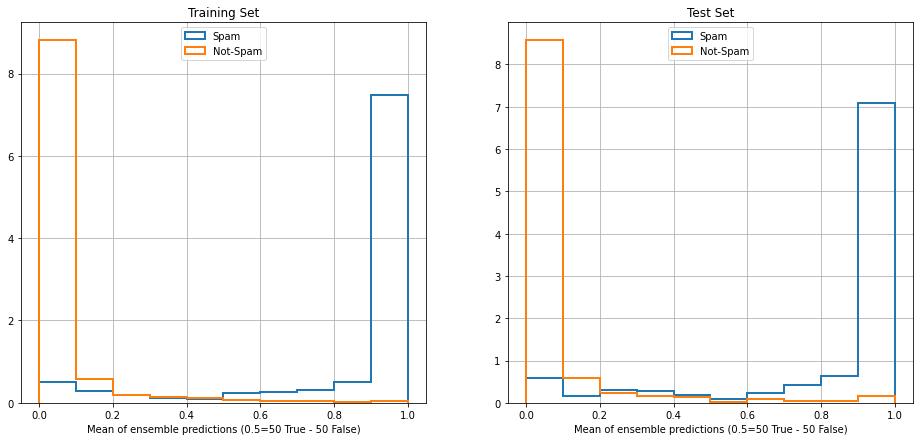

In [ ]:
num_to_avg = 100
fig, axs = plt.subplots(1, 2, figsize=(16, 7))
for (ax, label, predictions, y) in [
    (axs[0], 'Training Set', predictions_train, y_train), 
    (axs[1], 'Test Set' , predictions_test , y_test ) ]:
    
    # Take the average
    mean_predictions = predictions.iloc[:,:num_to_avg].mean(axis=1)
    
    # Plot the Spam
    mean_predictions[y == 1].hist(density=True, histtype='step', 
                                  range=[0,1], label='Spam', lw=2, ax=ax)
    
    # Plot the non Spam
    mean_predictions[y == 0].hist(density=True, histtype='step', 
                                  range=[0,1], label='Not-Spam', lw=2, ax=ax)
    ax.legend(loc='upper center');
    ax.set_xlabel("Mean of ensemble predictions (0.5=50 True - 50 False)")
    ax.set_title(label)


And now get final predictions: majority voting!

In [ ]:
# Function to ensemble the prediction of each bagged decision tree model
def get_prediction(df):
    return np.mean(df, axis=1)>0.5

# Check Accuracy of Spam Detection in Train and Test Set
acc_bagging_training = 100*accuracy_score(y_train, get_prediction(predictions_train))
acc_bagging_testing  = 100*accuracy_score(y_test, get_prediction(predictions_test))

print("Bagging: \tAccuracy, Training Set \t: {:0.2f}%".format(acc_bagging_training))
print("Bagging: \tAccuracy, Testing Set \t: {:0.2f}%".format( acc_bagging_testing))

Bagging: 	Accuracy, Training Set 	: 94.11%
Bagging: 	Accuracy, Testing Set 	: 92.01%


Count in the above code can be use to define the number of models the voting in the dataframe should be based on.

In [ ]:
# Get Performance by Class (Lookup Confusion Matrix)
pd.crosstab(np.array(y_test), model.predict(x_test), margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1,All
Actual,,,
0,766,38,804
1,94,441,535
All,860,479,1339



**Food for Thought :** Are these bagging models independent of each other, can they be trained in a parallel fashion?

-------------

**Let's talk about decision trees and bagging in the context of bias and variance.**

<img src="fig/bias_variance.png" alt="split2" width="45%"/>
<img src="fig/fitting.png" alt="split2" width="45%"/>

- When is a decision tree underfit? When is a decision tree overfit? Let's think about this in the concept of tree depth.

**Bagging enjoys the benefits of**:
- High expressiveness (by using larger trees it is able to approximate complex functions and decision boundaries).
- Low _ _ _ by averaging the prediction of all the models thus reducing the _ _ _ in the final prediction.

**What is the weakness of bagging?**
- In practice, the ensemble of trees tend to be **highly _ _ _**
- When could my bagging model be underfit? In what way does this apply to other ensemble methods?

## Exercise 2

*Let's try to improve our accuracy scores on the cancer dataset.*


In [ ]:
################################### Train Test split
np.random.seed(40)

#test_proportion
test_prop = 0.2
msk = np.random.uniform(0, 1, len(cancer_scaled)) > test_prop

#Split predictor and response columns
x_train, y_train = cancer_scaled[msk], target[msk]
x_test , y_test  = cancer_scaled[~msk], target[~msk]

print("Shape of Training Set :", x_train.shape)
print("Shape of Testing Set :" , x_test.shape)

1) Complete the `get_bagging_scores` function  below.

2) Using `get_bagging_scores` assign a dataframe `bagging_val_acc` using a class instance of `BaggingClassifier`. Try playing with different depths by feeding this object the argument `base_estimator = DecisionTreeClassifier(max_depth = DEPTH)` at initialization. The BaggingClassifier by default takes a `DecisionTreeClassifier`, but it can take other models as well. Try playing with different depths!

3) Use pandas groupby function to to get the mean cross-validation accuracy for specific numbers of estimators. Assign to a new dataframe `bagging_mean_acc`.

4) Visualize the mean cross validation accuracy scores by running the cell provided. Answer the subsequent questions.

In [ ]:
type(BaggingClassifier())

In [ ]:
def get_bagging_scores(x_train, y_train, model, bootstrap_range):
    """
    This function will take a model and a range of values and return a dataframe with columns: ["n_estimators", "cross_val_acc"]
    
    Arguments:
        model: the model to be run. Specifically this should be a class instance such as
            DecisionTreeClassifier().
        tree_depth_range: the range of values over which the tree depths should be saved.
        
    """
    # write an assert statement that enforces that the model entered is a BaggingClassifier
    assert ...

    # declare dictionaries
    mean_CV_acc = {}
    all_CV_acc = {}
    
    # find and store cross_validated scores
    for n_estimators in list(bootstrap_range):
        
        # modify the bagging ensemble models n_estimators (the number of trees it will fit)
        model.n_estimators = ...

        score = cross_val_score(estimator= ..., 
                                X = ..., 
                                y = ..., 
                                n_jobs = -1,
                                cv= ...)
        mean_CV_acc[n_estimators] = score.mean() 
    
    # make a dataframe from the dictionary:
    cv_acc_pd = pd.melt(pd.DataFrame(all_CV_acc))
    cv_acc_pd.columns = ["n_estimators", "cv_acc_score"]
    return cv_acc_pd

In [ ]:
# you can adjust the ensemble depth. Try to play with different depths!
DEPTH = 10

In [ ]:
# your code here: call the repaired get_bagging_scores function.
bagging_val_acc = get_bagging_df(x_train, 
                                 y_train, 
                                 model = ..., 
                                 bootstrap_range = ...,
                                 cv_samples = ...
                                 )

bagging_mean_acc  = ...

Run this code when you are finished with the first exercise to compare bagging and the simple decision tree. Final Questions lie below

In [ ]:
### add a decision tree classifier for comparison.
tree_val_acc = get_tree_scores(x_train, 
                           y_train, 
                           DecisionTreeClassifier(), 
                           tree_depth_range = range(1, 10))

tree_val_acc = pd.melt(pd.DataFrame(tree_val_acc), var_name = "depth", value_name = 'cv_acc_score')

tree_mean_acc  = tree_val_acc.groupby("depth").mean()
best_tree_depth  = tree_mean_acc.index[tree_mean_acc.idxmax()][0]

### Make the plot
plt.figure(figsize=(12, 3))
plt.title('Variation of Accuracy on Validation set with n_estimators - Bagging Classifier')
sns.lineplot(x = "n_estimators", y = "cv_acc_score", data = bagging_val_acc,  
             label = "Ensemble");
plt.axhline(tree_val_acc["cv_acc_score"].mean(), linestyle = '--', color = "red", label = "simple decision tree");

plt.xlabel("n_estimators")
plt.ylabel("validation set accuracy score")

max_idx = tree_mean_acc["cv_acc_score"].idxmax()

best_tree_model = DecisionTreeClassifier(max_depth=best_depth)
best_tree_model.fit(x_train, y_train)
tree_test_accuracy = best_tree_model.score(x_test, y_test.reshape(-1,))

max_idx = bagging_mean_acc["cv_acc_score"].idxmax()
best_n_estimators = bagging_mean_acc.index[max_idx]

best_ensemble_model = BaggingClassifier(n_estimators=best_n_estimators, random_state = 42)
best_ensemble_model.fit(x_train, y_train.reshape(-1,))
ensemble_accuracy = best_ensemble_model.score(x_test, y_test.reshape(-1,))

print("Decision Tree max depth {:}".format(best_depth))
plt.legend()

print("Best Decision Tree test set accuracy:  {:0.2f}%".format(tree_test_accuracy*100))
print("Best Ensemble test set accuracy:  {:0.2f}%".format(ensemble_accuracy*100))

- Why doesn't the bagging accuracy score deteriorate in the same way that the decision tree does for deeper trees?
- Does bagging reduce the variance or the bias of our error? How?
- Bonus question: How do random forests differ from Bagging?

#### Weaknesses of Bagging

Bagging is a greedy algorithm. What does this mean?
    We always choose the feature with the most impact: i.e. the most information gain.
    
In what scenarios is this likely to be a problem?

    
<img src="fig/dep_predictors.png" alt="split2" width="40%"/>

Imagine that this is the true underlying data generative process. Here predictors $x_2$ and $x_3$ influence $x_1$.

- Which predictor do you think bagging is likely to select as the root node?
- Why is this likely to be an issue?
- Because of their greedy nature, bagging ensembles are very likely to be correlated, especially in the shallower nodes of the individual decision trees.


**Why are decision trees greedy?**
- Decision trees are NP-complete, there is no way to find the global minima, i.e. the best tree, unless we use brute force and try all possible combinations. In practice this is infeasible.
- Thus decision trees are **hueristic algorithms**. Hueristic algorithms are designed to solve problems in a faster more efficient method by sacrificing optimality, accuracy or precision in favor of speed. Hueristic algorithms are often used to solve NP-complete problems.

### Random Forest

Random forests provide an improvement over bagged trees by way of a small tweak that decorrelates the trees. As in bagging, we build a number of decision trees on bootstrapped training samples. But when building these decision trees, each time a split in a tree is considered, a random sample of $m$ predictors is chosen as split candidates from the full set of $p$ predictors. The split is allowed to use only one of those $m$ predictors. A fresh sample of $m$ predictors is taken at each split, and typically we choose $m \approx \sqrt{p}$. In other words, in building a random forest, at each split in the tree, the algorithm is not even allowed to consider a majority of the available predictors. This may sound crazy, but it has a clever rationale. Suppose that there is one very strong predictor in the data set, along with a number of other moderately strong predictors. Then in the collection of bagged trees, most or all of the trees will use this strong predictor in the top split. Consequently, all of the **bagged trees will look quite similar to each other. Hence the predictions from the bagged trees will be highly correlated.** Unfortunately, averaging many highly correlated quantities does not lead to as large of a reduction in variance as averaging many uncorrelated quantities. In particular, this means that bagging will not lead to a substantial reduction in variance over a single tree in this setting. Random forests overcome this problem by forcing each split to consider only a subset of the predictors.

scikit-learn offers classes to build Random Forest models for both classification and regression (see `RandomForestClassifier` and `RandomForestRegressor` classes). The more important parameters are the number of trees (`n_estimators`) and the maximum number of features $m$ each tree is allowed to use (`max_features`). See the [parameter tuning guidelines](https://scikit-learn.org/stable/modules/ensemble.html#parameters) for more details.

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

clf = RandomForestClassifier(n_estimators=100, max_features='sqrt')
clf.fit(X, y)

RandomForestClassifier(max_features='sqrt')

## Random forest with the Spam dataset

Now, we will fit a Random Forest model setting ```n_estimators = predictor_count/2``` and ```max_depth = best_depth```.

In [ ]:
# Fit a Random Forest Model
best_depth = 7
# Training
model = RandomForestClassifier(n_estimators=int(x_train.shape[1]/2), max_depth=best_depth)
model.fit(x_train, y_train)

# Predict
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Performance Evaluation
acc_random_forest_training = accuracy_score(y_train, y_pred_train)*100
acc_random_forest_testing = accuracy_score(y_test, y_pred_test)*100

print("Random Forest: Accuracy, Training Set : {:0.2f}%".format(acc_random_forest_training))
print("Random Forest: Accuracy, Testing Set :  {:0.2f}%".format(acc_random_forest_testing))

Random Forest: Accuracy, Training Set : 94.79%
Random Forest: Accuracy, Testing Set :  93.43%


Let's compare the performance of our 3 models:

In [ ]:
print("Decision Trees:\tAccuracy, Training Set \t: {:.2%}".format(acc_trees_training))
print("Decision Trees:\tAccuracy, Testing Set \t: {:.2%}".format(acc_trees_testing))

print("\nBagging: \tAccuracy, Training Set \t: {:0.2f}%".format(acc_bagging_training))
print("Bagging: \tAccuracy, Testing Set \t: {:0.2f}%".format(acc_bagging_testing))

print("\nRandom Forest: \tAccuracy, Training Set \t: {:0.2f}%".format(acc_random_forest_training))
print("Random Forest: \tAccuracy, Testing Set \t: {:0.2f}%".format(acc_random_forest_testing))

Decision Trees:	Accuracy, Training Set 	: 94.39%
Decision Trees:	Accuracy, Testing Set 	: 90.81%

Bagging: 	Accuracy, Training Set 	: 97.70%
Bagging: 	Accuracy, Testing Set 	: 93.35%

Random Forest: 	Accuracy, Training Set 	: 94.79%
Random Forest: 	Accuracy, Testing Set 	: 93.43%


**As we see above, the performance of both Bagging and Random Forest are similar, so what is the difference? Do both overfit the data just as much?**

Hint:

- What is the only extra parameter we declared when defining a Random Forest Model vs Bagging? Does it have an impact on overfitting?

In [ ]:
# Fit a Random Forest Model

new_depth = best_depth + 20

# Training
model = RandomForestClassifier(n_estimators=int(x_train.shape[1]/2), max_depth=new_depth)
model.fit(x_train, y_train)

# Predict
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Perfromance Evaluation
acc_random_forest_deeper_training = accuracy_score(y_train, y_pred_train)*100
acc_random_forest_deeper_testing = accuracy_score(y_test, y_pred_test)*100

print("Random Forest: Accuracy, Training Set (Deeper): {:0.2f}%".format(acc_random_forest_deeper_training))
print("Random Forest: Accuracy, Testing Set (Deeper):  {:0.2f}%".format(acc_random_forest_deeper_testing))

Random Forest: Accuracy, Training Set (Deeper): 99.82%
Random Forest: Accuracy, Testing Set (Deeper):  94.47%


Training accuracies:

In [ ]:
print("Training Accuracies:")
print("Decision Trees:\tAccuracy, Training Set \t: {:.2%}".format(acc_trees_training))
print("Bagging: \tAccuracy, Training Set \t: {:0.2f}%".format(acc_bagging_training))
print("Random Forest: \tAccuracy, Training Set \t: {:0.2f}%".format(acc_random_forest_training))
print("RF Deeper: \tAccuracy, Training Set \t: {:0.2f}%".format(acc_random_forest_deeper_training))

Training Accuracies:
Decision Trees:	Accuracy, Training Set 	: 94.39%
Bagging: 	Accuracy, Training Set 	: 97.70%
Random Forest: 	Accuracy, Training Set 	: 94.79%
RF Deeper: 	Accuracy, Training Set 	: 99.82%


Testing accuracies:

In [ ]:
print("Testing Accuracies:")
print("Decision Trees:\tAccuracy, Testing Set \t: {:.2%}".format(acc_trees_testing))
print("Bagging: \tAccuracy, Testing Set \t: {:0.2f}%".format( acc_bagging_testing))
print("Random Forest: \tAccuracy, Testing Set \t: {:0.2f}%".format(acc_random_forest_testing))
print("RF Deeper:  \tAccuracy, Testing Set \t: {:0.2f}%".format(acc_random_forest_deeper_testing))

Testing Accuracies:
Decision Trees:	Accuracy, Testing Set 	: 90.81%
Bagging: 	Accuracy, Testing Set 	: 93.35%
Random Forest: 	Accuracy, Testing Set 	: 93.43%
RF Deeper:  	Accuracy, Testing Set 	: 94.47%


**Is the Random Forest ensemble interpretable? How many nodes are in a single decision tree?**

The `.estimators_` attribute of a RandomForestClassifier class instance is a list of the individual DecisionTreeClassifier class instance estimators that make up the ensemble model. Calling `.tree_` on the DecisionTreeClassifier will give you the individual tree estimator. You learn more details on the scikit-learn tree structure by reading the [documentation](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html).

In [ ]:
# vars(model)

In [ ]:
print(model.estimators_[0].tree_.node_count)

521


## Exercise 3

Let's try to improve our accuracy scores on the cancer dataset.

In [ ]:
from functions import tree_pd

get_tree_scores = tree_pd.get_tree_scores
cancer_scaled, target = tree_pd.load_cancer_dataset(10, 4)

Design matrix shape (569, 10)


,texture error,worst texture,worst symmetry,compactness error,worst radius,worst compactness,concave points error,worst fractal dimension,fractal dimension error,mean radius
0,-0.565265,-1.359293,2.750622,1.316862,1.886690,2.616665,0.660820,1.937015,0.907083,1.097064
1,-0.876244,-0.369203,-0.243890,-0.692926,1.805927,-0.430444,0.260162,0.281190,-0.099444,1.829821
2,-0.780083,-0.023974,1.152255,0.814974,1.511870,1.082932,1.424827,0.201391,0.293559,1.579888
3,-0.110409,0.133984,6.046041,2.744280,-0.281464,3.893397,1.115007,4.935010,2.047511,-0.768909


target classes    {1: 'Benign', 0: 'Malignant'}
There are 357 Benign cases and 212 Malignant cases in the target


In [ ]:
# Train-Test split
np.random.seed(40)

# test_proportion
test_prop = 0.2
msk = np.random.uniform(0, 1, len(cancer_scaled)) > test_prop

# Split predictor and response columns
ex1_x_train, ex1_y_train =  cancer_scaled[msk], target[msk]
ex1_x_test , ex1_y_test  = cancer_scaled[~msk], target[~msk]

print("Shape of Training Set :", ex1_x_train.shape)
print("Shape of Testing Set :" , ex1_x_test.shape)

Shape of Training Set : (448, 10)
Shape of Testing Set : (121, 10)



1) Use the `get_tree_scores` function to assign a dataframe `rf_val_acc` using a class instance of `RandomForestClassifier`. As a reminder, this function takes four arguments (x_train, y_train, model, tree_depth_range). This time don't feed a random state.

2) Use pandas groupby function to to get the mean cross-validation accuracy for specific depths. Assign to a new dataframe `rf_mean_acc`.

3) Visualize the mean cross validation accuracy scores by running the cell provided. Answer the subsequent questions.

4) Plot the feature importance of the best random forest model.

In [ ]:
# Your code here



,cv_acc_score,depth
depth,,
1,0.913030,1
3,0.948788,3
5,0.951010,5
7,0.953232,7
9,0.953131,9
11,0.955455,11
13,0.951010,13
15,0.953232,15
17,0.948788,17


Run this code when you are finished with the first exercise to compare random forests and simple decision trees. More questions and one final task lie below.

Decision Tree best depth 7
Random Forest best depth 23
Best Decision Tree test set accuracy:  91.74%
Best Random Forest test set accuracy:  95.04%


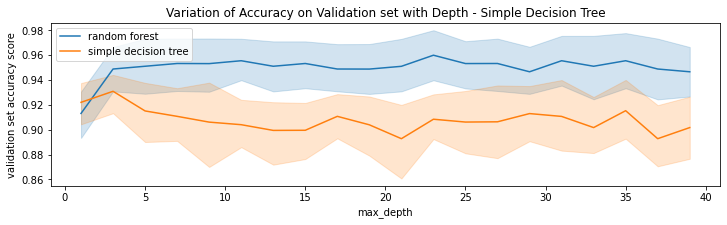

In [ ]:
### add a decision tree classifier for comparison.
tree_val_acc = get_tree_scores(ex1_x_train, 
                               ex1_y_train, 
                               DecisionTreeClassifier(), 
                               tree_depth_range)

tree_mean_acc  = tree_val_acc.groupby("depth").mean()
tree_mean_acc["depth"] = list(tree_depth_range)

### Make the plot
plt.figure(figsize=(12, 3))
plt.title('Variation of Accuracy on Validation set with Depth - Simple Decision Tree')
sns.lineplot(x = "depth", y = "cv_acc_score", data = rf_val_acc,  
             label = "random forest");
sns.lineplot(x = "depth", y = "cv_acc_score", data = tree_val_acc, 
             label = "simple decision tree");
plt.xlabel("max_depth")
plt.ylabel("validation set accuracy score")

max_idx = tree_mean_acc["cv_acc_score"].idxmax()
best_depth_tree = tree_mean_acc["depth"][max_idx]

best_tree_model = DecisionTreeClassifier(max_depth=best_depth)
best_tree_model.fit(ex1_x_train, ex1_y_train)
tree_test_accuracy = best_tree_model.score(ex1_x_test, ex1_y_test.reshape(-1,))

max_idx = rf_mean_acc["cv_acc_score"].idxmax()
best_depth_rf = rf_mean_acc["depth"][max_idx]

best_rf_model = RandomForestClassifier(max_depth=best_depth_rf, random_state = 42)
best_rf_model.fit(ex1_x_train, ex1_y_train.reshape(-1,))
tree_rf_accuracy = best_rf_model.score(ex1_x_test, ex1_y_test.reshape(-1,))

print("Decision Tree best depth {:}".format(best_depth))
print("Random Forest best depth {:}".format(best_depth_rf))

print("Best Decision Tree test set accuracy:  {:0.2f}%".format(tree_test_accuracy*100))
print("Best Random Forest test set accuracy:  {:0.2f}%".format(tree_rf_accuracy*100))

- Why doesn't the random forest accuracy score deteriorate in the same way that the decision tree does for deeper trees?
- What are the two kinds of stochasticity that lead to the robustness of random forests?
- How do random forests differ from Bagging?

#### Feature Importance
**Let's plot the feature importance of the best random forest model:**
Random Forest gives the above values as ```feature_importance``` where it normalizes the impact of a predictor to the number of times it is useful and thus gives overvall significance for free. Explore the attributes of the Random Forest model object for the best nodes.

Feature importance is calculated as the decrease in node impurity **weighted by the probability of reaching that node. The node probability can be calculated by the number of samples that reach the node**, divided by the total number of samples. The higher the value the more important the feature.

source: https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3#:~:text=Feature%20importance%20is%20calculated%20as,the%20more%20important%20the%20feature.

1) Extract the `.feature_importances_` attribute from your `best_rf_model`. Assign this to a variable called `feature_importance`.

2) Rescale the feature importances such that the most important feature is has an importance of 100.

3) Use `np.argsort` to return the indices of the sorted features.

4) Finally pass the sorted index to `plt.barh` and plot the feature importances!

In [ ]:
feature_importance = ...
feature_importance = ...
sorted_idx = ...


pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(10,12))
plt.barh(pos, ..., align='center')
plt.yticks(pos, ex1_x_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

#### Inspect the tree object

For more resources on Python classes and objects (we're relying on them all the time via sklearn!) see <a href = "https://docs.python.org/3/tutorial/classes.html#a-first-look-at-classes">this link.</a>

In [ ]:
from functions import tree_pd
import numpy as np

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.ensemble import BaggingRegressor

%matplotlib inline

pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

from sklearn.model_selection import learning_curve

get_tree_pd = tree_pd.get_tree_scores
cancer_scaled, target = tree_pd.load_cancer_dataset(10, 4)

#### Train-Test split
np.random.seed(40)

# test_proportion
test_prop = 0.2
msk = np.random.uniform(0, 1, len(cancer_scaled)) > test_prop

# Split predictor and response columns
X_train, y_train =  cancer_scaled[msk], target[msk]
X_test , y_test  = cancer_scaled[~msk], target[~msk]

print("Shape of Training Set :", X_train.shape)
print("Shape of Testing Set :" , X_test.shape)

#### Train a bagging and random forest model

depth = 13
n_estimators = 100
best_rf_model = RandomForestClassifier(max_depth=depth, random_state=42, n_estimators=n_estimators)
best_rf_model.fit(X_train, y_train.reshape(-1,))
tree_rf_accuracy = best_rf_model.score(X_test, y_test.reshape(-1,))


bagging_model = BaggingRegressor(DecisionTreeClassifier(max_depth=depth), 
                                 n_estimators = 100,
                                 random_state = 42).fit(X_train, y_train.reshape(-1,))

Run the cells below and look at the output to inspect the tree object structure. Then complete the following tasks:
1. Complete the function by extracting the impurity and feature attributes for each decision tree estimator at a specific decision node.
2. Fix the creation of the dictionary at the bottom of the function and return a dataframe.

In [ ]:
type(best_rf_model.estimators_[0].tree_)

In [ ]:
type(best_rf_model)

In [ ]:
help(best_rf_model.estimators_[0].tree_)

In [ ]:
# Complete the function

def get_impurity_pd(model, n = 0):
    """
    This function returns a pandas dataframe with all of the nth nodes feature impurities.
    """
    rf_estimators = model.estimators_.copy()
    features = np.array(X_train.columns)
    
    node_impurities, node_features = [], []

    for i, estimator in enumerate(rf_estimators):
        estimator_impurity = ___ # Your code here
        estimator_feature  = ___ # Your code here
        
        node_impurities.append(estimator_impurity)
        node_features.append(estimator_feature)
        
    node_impurity_dict = {"feature": ___ # Your code here
                        "impurity": ___ # Your code here
    df = ___ # Your code here
    return(df)

In [ ]:
tree_node = 0
rf_df = get_impurity_pd(best_rf_model, tree_node)
bagging_df = get_impurity_pd(bagging_model, tree_node)

# plot
fig, ax = plt.subplots(1,2, figsize = (20, 5))
ax.ravel()

sns.swarmplot(x = "feature", y = "impurity", data = rf_df, ax = ax[0])
ax[0].tick_params(labelrotation=45)
ax[0].set_title("Random Forest: Node 0 impurities after split")

sns.swarmplot(x = "feature", y = "impurity", data = bagging_df, ax = ax[1])
ax[1].set_title("Bagging: Node 0 impurities after split")
plt.xticks(rotation=45);

____________

#### The limitations of Random Forest

**When can Random Forest overfit?**
- Increasing the number of trees in RF generally doesn't increase the risk of overfitting, BUT if the number of trees in the ensemble is too large then the trees in the ensemble may become correlated, and therefore increase the variance.

**When can Random Forest fail?**
- When we have a lot of predictors that are completely independent of the response and one (or few) overwhelmingly influential predictor.

**Why aren't random forests and bagging interpretable?  How about a very deep decision tree?**

____________

### Boosting

We now discuss boosting, yet another approach for improving the predictions resulting from a decision tree. Like bagging, boosting is a general approach that can be applied to many statistical learning methods for regression or classification. 
The general idea of boosting is to combine multiple weak learners (simple models that perform slightly better than random guessing) into a strong learner (a more powerful and accurate model). Boosting is an ensemble learning technique that sequentially trains weak learners, where each subsequent learner focuses on the mistakes made by the previous learners. The key concept behind boosting is to iteratively improve the performance of the ensemble by emphasizing the instances that are difficult to classify or predict correctly. This is typically achieved by adjusting the weights of the training instances or the residuals of the previous models. By doing so, subsequent weak learners are forced to concentrate on the challenging instances, effectively reducing the overall error of the ensemble.

#### Bagging and random forest vs. Boosting

- **Bagging and Random Forest:**
  - complex and deep trees **overfit**
  - thus **let's perform variance reduction on complex trees!**
- **Boosting:** 
  - simple and shallow trees **underfit** 
  - thus **let's perform bias reduction of simple trees!**
  - make the simple trees more expressive!
  
**Boosting** attempts to improve the predictive flexibility of simple models.
 - It trains a **large number of “weak” learners in sequence**.
 - A weak learner is a constrained model (limit the max depth of each decision tree).
 - Each one in the sequence focuses on **learning from the mistakes** of the one before it.
 - By more heavily weighting in the mistakes in the next tree, our next tree will learn from the mistakes.
 - Combining all the weak learners into a single strong learner = **a boosted tree**.

<img src="fig/gradient_boosting1.png?" alt="tree_adj" width="70%"/>

----------

**Illustrative example** 
(from [source](https://towardsdatascience.com/underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6fe4a8a49dbf))

<img src="fig/boosting.png" alt="tree_adj" width="70%"/>

**We build multiple trees consecutively: Tree 1 -> Tree 2 -> Tree 3 - > ...**

**The size of the plus or minus signs indicates the weights of a data points for every Tree**. How do we determine these weights?

For each consecutive tree and iteration we do the following:
 - The **wrongly classified data points ("mistakes" = red circles)** are identified and **more heavily weighted in the next tree (green arrow)**
 - Thus the size of the plus or minus changes in the next tree
 - This change in weights will influence and change the next simple decision tree
 - The **correct predictions are** identified and **less heavily weighted in the next tree**.

We iterate this process for a certain number of times, stop and construct our final model: 
- The ensemble (**"Final: Combination"**) is a linear combination of the simple trees, and is more expressive!
- The ensemble (**"Final: Combination"**) has indeed not just one simple decision boundary line, and fits the data better.
 
 
<img src="data/boosting_2.png?" alt="tree_adj" width="70%"/>

**Food for Thought :**
- Are **boosted models independent of one another?** Do they need to wait for the previous model's residuals?
- Are **bagging or random forest models independent of each other**, can they be trained in a parallel fashion?

#### What is Gradient Boosting and XGBoost?

#### What is Gradient Boosting?

To improve its predictions, **gradient boosting looks at the difference between its current approximation, and the known correct target vector, which is called the residual**.

The mathematics:

- It may be assumed that there is some imperfect model $F_{m}$ 
- The gradient boosting algorithm improves on $F_{m}$ constructing a new model that adds an estimator $h$ to provide a better model: 
$$F_{m+1}(x)=F_{m}(x)+h(x)$$

- To find $h$, the gradient boosting solution starts with the observation that a perfect **h** would imply

$$F_{m+1}(x)=F_{m}(x)+h(x)=y$$

- or, equivalently solving for h,

$$h(x)=y-F_{m}(x)$$

- Therefore, gradient boosting will fit h to the residual $y-F_{m}(x)$

<img src="fig/gradient_boosting2.png" alt="tree_adj" width="80%"/>


-------

#### XGBoost: ["Long May She Reign!"](https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d)

<img src="fig/kaggle.png" alt="tree_adj" width="100%"/>


----------

### What is XGBoost and why is it so good!?
 - **Based on Gradient Boosting**: XGBoost utilizes a more advanced and efficient approach to compute the gradient and update the ensemble's predictions. It employs second-order gradient information (Hessian) to further refine the learning process and handle more complex loss functions.
 - XGBoost = **eXtreme Gradient Boosting**; refers to the engineering goal to push the limit of computations resources for boosted tree algorithm.
 - **Handling of missing values**: XGBoost has built-in handling for missing values in input data. It automatically learns how to best handle missing values during training, without requiring manual imputation or preprocessing steps.
 
**Accuracy:**
 - XGBoost however uses a **more regularized model formalizaiton to control overfitting** (= better performance) by both L1 and L2 regularization.
 - Tree Pruning methods: XGBoost employs tree pruning techniques to control model complexity and reduce overfitting
 - Improved convergence techniques (like early stopping when no improvement is made for X number of iterations)
 - Built-in Cross-Validation
 
**Computing Speed:**
 - Special Vector and matrix type data structures for faster results.
 - Parallelized tree building: using all of your CPU cores during training.
 - Distributed Computing: for training very large models using a cluster of machines.
 - Cache Optimization of data structures and algorithm: to make best use of hardware.

**XGBoost is building boosted trees in parallel? What? How?**
- No: Xgboost doesn't run multiple trees in parallel, you need predictions after each tree to update gradients.
- Rather it does the parallelization WITHIN a single tree my using openMP to create branches independently.

#### How to build XGBoost models in Python?
In Python we build XGBoost model with the xgboost library as in the following example:

In [1]:
from xgboost import XGBClassifier
# read data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=.2)
# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_test)

[13:33:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Ticio\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Read the [official documentation](https://xgboost.readthedocs.io/en/latest/tutorials/param_tuning.html) for details on how to tune the xgboost hyperparameters

## XGBoost with the Spam dataset

In [ ]:
# Let's install XGBoost
#! pip install xgboost

In [ ]:
import xgboost as xgb

# Create the training and test data with DMatrix
# DMatrix is the basic data storage for XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Parameters
param = {
    'max_depth': best_depth,        # the maximum depth of each tree
    'eta': 0.3,                     # the training step for each iteration (also called learning rate)
    'silent': 1,                    # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training (softmax objective)
    'num_class': 2}                 # the number of classes that exist in this datset

# Number of training iterations, that is, number of trees 
num_round = 200  

# Start timer
start = time.time()

# Train XGBoost
bst = xgb.train(param, 
                dtrain, 
                num_round, 
                evals= [(dtrain, 'train')], 
                early_stopping_rounds=20, # early stopping
                verbose_eval=20)


# Make prediction training set
preds_train = bst.predict(dtrain)
best_preds_train = np.asarray([np.argmax(line) for line in preds_train])

# Make prediction test set
preds_test = bst.predict(dtest)
best_preds_test = np.asarray([np.argmax(line) for line in preds_test])

# Performance Evaluation 
acc_XGBoost_training = accuracy_score(y_train, best_preds_train)*100
acc_XGBoost_test = accuracy_score(y_test, best_preds_test)*100

# Stop Timer
end = time.time()
elapsed_xgboost = end - start

print("XGBoost:\tAccuracy, Training Set \t: {:0.2f}%".format(acc_XGBoost_training))
print("XGBoost:\tAccuracy, Testing Set \t: {:0.2f}%".format(acc_XGBoost_test))

[13:29:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:29:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-mlogloss:0.49037
[20]	train-mlogloss:0.05306
[40]	train-mlogloss:0.02732
[60]	train-mlogloss:0.01627
[80]	train-mlogloss:0.01039
[100]	train-mlogloss:0.00747
[120]	train-mlogloss:0.00575
[140]	train-mlogloss:0.00471
[160]	train-mlogloss:0.00400
[180]	train-mloglos

**What's the difference between XGBClassifier and xgb.train?**

XGBClassifier is a scikit-learn compatible class which can be used in conjunction with other scikit-learn utilities. It's just a wrapper over the xgb.train, in which you don't need to supply advanced objects like Booster etc. 

----------
#### The history of boosting algorithms

The first implementation of a boosting algorithm dates back to 1995 when Yoav Freund and Robert Schapire proposed the AdaBoost algorithm, short for Adaptive Boosting. Later on, other boosting algorithms were developed, like Gradient Boosting. The key idea of Gradient Boosting algorithms is to iteratively add weak learners to the ensemble, with each weak learner fitting the negative gradient (pseudo-residuals) of the loss function. By continuously updating the ensemble's predictions, the algorithm gradually reduces the errors made by the previous weak learners. The learning rate controls the contribution of each weak learner, preventing overfitting and allowing the ensemble to generalize well.

XGBoost (or eXtreme Gradient Boosting) is an optimized Boosting Algorithm. Since its introduction, this algorithm has not only been credited with winning numerous Kaggle competitions but also for being the driving force under the hood for several cutting-edge industry applications. Its combination of speed, accuracy, and flexibility makes it a powerful tool for solving regression, classification, and ranking problems. Moreover, XGBoost provides interfaces for multiple programming languages, including Python, R, Java, and Julia, making it easily accessible to a wide range of users. XGBoost extends the capabilities of traditional gradient boosting and introduces several techniques to improve model performance and efficiency.

**Overview of all the tree algorithms:** [Source](https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d)

<img src="fig/trees.png" alt="tree_adj" width="100%"/>

----------

## Recap of the Bias vs Variance tradeoff

A central notion underlying what we've been learning in lectures so far is the trade-off between bias and variance, overfitting and underfitting. Here is a recap of the main concepts:

- The **bias** of a model quantifies how precise a model is across training sets. 
- The **variance** quantifies how sensitive the model is to small changes in the training set. 
- A **robust** model is not overly sensitive to small changes. 
- **The dilemma involves minimizing both bias and variance**; we want a precise and robust model. Simpler models tend to be less accurate but more robust. Complex models tend to be more accurate but less robust.

**How to reduce bias:**
 - **Use more complex models, more features, less regularization,** ...
 - **Boosting:** attempts to improve the predictive flexibility of simple models. Boosting uses simple base models and tries to “boost” their aggregate complexity.
 
**How to reduce variance:**
 - **Early Stopping:** Its rules provide us with guidance as to how many iterations can be run before the learner begins to over-fit.
 - **Pruning:** Pruning is extensively used while building related models. It simply removes the nodes which add little predictive power for the problem in hand.
 - **Regularization:** It introduces a cost term for bringing in more features with the objective function. Hence it tries to push the coefficients for many variables to zero and hence reduce cost term.
 - **Train with more data:** It won’t work every time, but training with more data can help algorithms detect the signal better.
 - **Ensembling:** Ensembles are machine learning methods for combining predictions from multiple separate models. For example:
   - **Bagging** attempts to reduce the chance of overfitting complex models: Bagging uses complex base models and tries to “smooth out” their predictions.